In [96]:
# imports
import numpy as np # generic math functions
import numpy.linalg as la
#import scipy.linalg as linalg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

%load_ext autoreload
%autoreload 2
import qpdcsim as q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
d=2 # physical Hilbert space dimension (2 for spin-1/2)
N=3 # level of rational approximation, frequencies = [1, F_{N+1}/F_N]
L=5 # horizontal length of truncated strip of frequency lattice

sim = q.FiboSim(d,N,L) # setup simulator object

#sim.plot_freq_lattice()

In [111]:
# define the drive Hamiltonian interactions
pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':0.5, # stdev of Gaussian
                                    'weight':np.pi/2, # integrated weight
                                    'cutoff':5} # number of Fourier components (+/-) to truncate to
                     }
                    )
pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':0.5,
                                    'weight':1.0*np.pi/2,
                                    'cutoff':5}
                     }
                    )
# add the interactions to the simulator object (as list)
sim.interactions = [pulse1,pulse2]

# sweep over "flux" through compactified direction on Frequency lattice
# and compute quasi-energy spectrum
N_sweep = 21 # number of points to sweep
fluxes = np.linspace(-np.pi,np.pi,N_sweep) # fluxes to sweep over

Es =np.zeros([N_sweep,sim.Hsize]) # quasi-energy spectrum
for j in range(N_sweep):    
    Es[j,:],psi=sim.compute_spectrum(flux=fluxes[j])

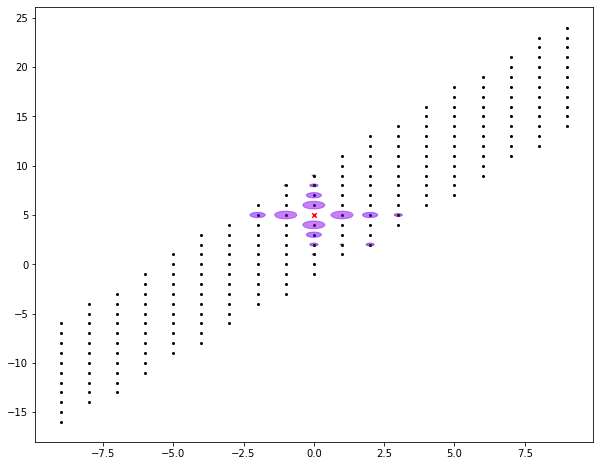

In [112]:
# visualize interactions
s1 = np.floor(sim.size/2) # pick a site in the middle of the strip
sim.plot_interactions(s1)

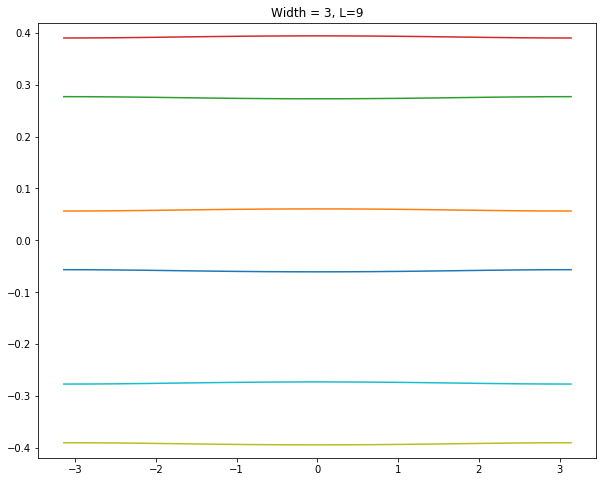

In [113]:
# simulate the quasi-energy spectrum
plt.figure()
ylim = np.pi/(q.Fibonacci(N+1)*q.Fibonacci(N))
plt.plot(fluxes,Es)
plt.ylim(-2*ylim,2*ylim)
plt.title('Width = %s' % q.Fibonacci(N) + ', L=%s'%L)
plt.show()